# Обучение и предсказание

In [61]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/feature_check_001.csv', index_col='Наименование ДП')
df.tail()

,Итого,"Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.","2019, Основные средства , RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2019, Заёмные средства (долгосрочные), RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2019, Долгосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB",Факт просрочки
Наименование ДП,,,,,,,,,,,,,,,
526,70.0,0,0.0,0,0.0,1.210191e+06,8.025478e+06,6.755414e+06,3.194904e+07,3.775223e+07,6.755414e+06,3.194904e+07,3.775223e+07,4.965796e+07,False
527,0.0,0,0.0,0,0.0,1.072955e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.155414e+06,2.354777e+06,7.968153e+05,1.562490e+08,False
528,50.0,0,0.0,0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,False
529,70.0,0,0.0,0,0.0,7.598726e+05,2.787452e+07,1.580127e+08,1.666369e+08,1.208955e+08,1.580210e+08,1.903682e+08,1.578911e+08,5.680981e+08,False
530,10.0,0,0.0,0,0.0,2.043312e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.374522e+06,1.119427e+07,False


In [6]:
df.describe()

,Итого,"Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.","2019, Основные средства , RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2019, Заёмные средства (долгосрочные), RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2019, Долгосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB"
count,525.000000,531.000000,531.000000,531.000000,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02
mean,30.400000,26.924670,10.263054,9.167608,6.155193e+06,7.726455e+09,3.748335e+09,3.935466e+09,4.797155e+09,4.627470e+09,5.263869e+09,6.291704e+09,6.224511e+09,3.117675e+09
std,48.575431,69.438625,32.093828,31.945180,2.252694e+07,6.396236e+10,3.640043e+10,4.726859e+10,5.313151e+10,4.961984e+10,4.993112e+10,5.649485e+10,5.359923e+10,1.279101e+10
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.101911e+04,0.000000e+00,-3.247771e+06,-1.357962e+06,0.000000e+00,0.000000e+00
25%,10.000000,0.000000,0.000000,0.000000,0.000000e+00,4.136943e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.044586e+04,2.967484e+07
50%,20.000000,5.000000,2.673077,0.000000,0.000000e+00,3.365096e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.897452e+06,5.820382e+06,7.420382e+06,1.302274e+08
75%,30.000000,18.000000,6.049462,6.000000,2.739224e+06,2.719255e+08,1.433153e+07,2.610478e+07,5.147739e+07,4.853312e+07,6.056847e+07,1.180487e+08,1.359045e+08,6.925752e+08
max,370.000000,489.000000,357.000000,445.000000,2.716331e+08,1.037724e+12,7.441625e+11,1.038017e+12,1.142727e+12,1.058461e+12,1.058396e+12,1.171881e+12,1.090158e+12,1.817083e+11


In [45]:
df_x = df.drop('Макс. ПДЗ за 2020 год, дней', axis=1)
df_y = df['Макс. ПДЗ за 2020 год, дней']

df_train_x = df_x.sample(frac=0.7, random_state=1234)
df_test_x = df_x[~df_x.index.isin(df_train_x.index)]

df_train_y = df_y.sample(frac=0.7, random_state=1234)
df_test_y = df_y[~df_y.index.isin(df_train_y.index)]

# df_train, df_test = df.random_split([0.9,0.1],random_state=1234)
print(f' Всего данных {df.shape[0]},\n \
Обучающая выборка X {df_train_x.shape},\n \
Тестовая выборка X {df_test_x.shape}, \n \
Обучающая выборка Y {df_train_y.shape},\n \
Тестовая выборка Y {df_test_y.shape}')


 Всего данных 531,
 Обучающая выборка X (372, 14),
 Тестовая выборка X (159, 14), 
 Обучающая выборка Y (372,),
 Тестовая выборка Y (159,)


In [ ]:
# # read in data
# params = {'objective': 'binary:logistic', 'nround': 1000,
#           'max_depth': 16, 'eta': 0.01, 'subsample': 0.5,
#           'min_child_weight': 1, 'tree_method': 'hist',
#           'grow_policy': 'lossguide'}


# bst = xgb.train(params, df_train_x, df_train_y)

In [46]:
# fit model no training data
model = XGBClassifier()
model.fit(df_train_x, df_train_y)

/home/alexey/anaconda3/envs/SkillFactory/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [47]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [48]:
# make predictions for test data
y_pred = model.predict(df_test_x)
predictions = [round(value) for value in y_pred]

In [51]:
# evaluate predictions
accuracy = accuracy_score(df_test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.46%


Верность предсказания факта просрочки 100.0%
Средняя ошибка предсказания 20.0 дней.


,"Макс. ПДЗ за 2020 год, дней","Макс. ПДЗ за 2020 год, дней_bool",pred_y,pred_y_bool,Ошибка дней,acc_bool
Наименование ДП,,,,,,
1,4,True,4,True,0,True
2,6,True,13,True,7,True
3,8,True,21,True,13,True
4,1,True,1,True,0,True
10,54,True,78,True,24,True
...,...,...,...,...,...,...
518,2,True,2,True,0,True
521,3,True,4,True,1,True
525,0,False,0,False,0,True


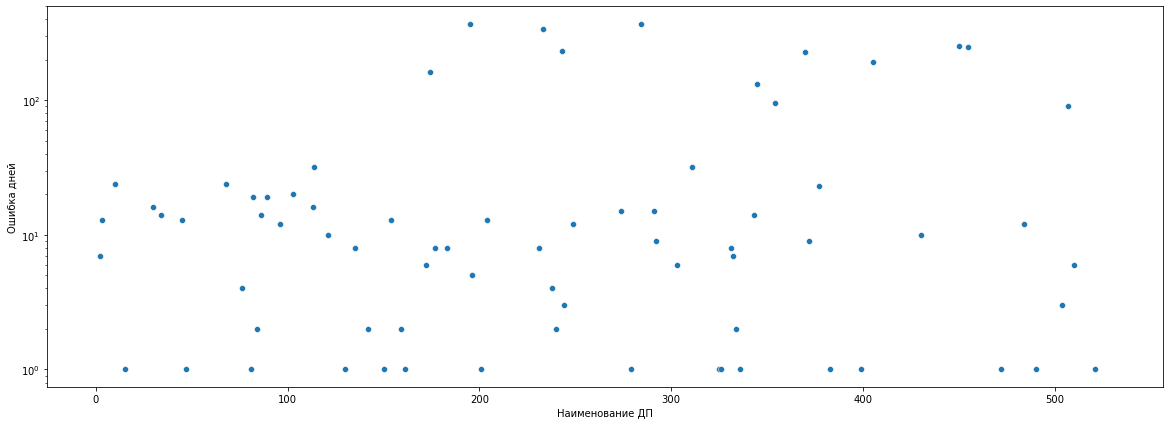

In [84]:
df_rez = pd.DataFrame(df_test_y)
df_rez['Макс. ПДЗ за 2020 год, дней_bool'] = df_rez['Макс. ПДЗ за 2020 год, дней'] > 0
df_rez['pred_y'] = y_pred
df_rez['pred_y_bool'] = df_rez['pred_y'] > 0
df_rez['Ошибка дней'] = (df_rez['pred_y'] - df_rez['Макс. ПДЗ за 2020 год, дней']).abs()
df_rez['acc_bool'] = df_rez['Макс. ПДЗ за 2020 год, дней_bool'] == df_rez['pred_y_bool']

fig, ax = plt.subplots(figsize=(20,7))
ax.set(yscale="log") #xscale="log", 
sns.scatterplot(x=df_rez.index,
                y=df_rez['Ошибка дней'],
                ax=ax);
# sns.scatterplot(x=df_rez.index,
#                 y=y_pred,
#                 ax=ax);
print(f'Верность предсказания факта просрочки {100 / df_rez.shape[0] * df_rez["acc_bool"].sum()}%')
print(f'Средняя ошибка предсказания {int(df_rez["Ошибка дней"].mean())} дней.')
df_rez